### INTRODUCTION

In this **binary supervised classification** exercise we will try to predict using various ML models if a player will have a career longer than 5 years or shorter.

The dataset contains a list of 1,340 NBA players with their game stats.

Let the game begin !

#### Import Libraries

In [621]:
# https://data.world/exercises/logistic-regression-exercise-1
# https://thecomeback.com/wp-content/uploads/2022/10/NBAonTNT-e1666117579590.jpg

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Ignore scikit- warnings:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

### Define Color Palette for our graphs

In [622]:
colors = ['#e0fbfc', '#ee6c4d', '#98c1d9', '#3d5a80', '#293241']

sns.set_palette(sns.color_palette(colors))

## Read Data

In [677]:
df = pd.read_csv("./data/nba.csv")
df = df.rename(columns={'TARGET_5Yrs': 'TARGET'})
df.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Data contains:

* **Name**: Name
* **GP**: Games Played
* **MIN**: Minutes Played
* **PTS**: Points Per game
* **FGM**: Field Goals Made
* **FGA**: Field Goal Attempts
*  **FG %**: Field Goal Percent
*  **3P Made** : 3 Point Made
*  **3PA** : 3 Point Attempts
*  **3P%** : 3 Point Attempts
*  **FTM** : Free Throw Made
*  **FTA**: Free Throw Attempts
*  **FT %**: Free Throw Percent
*  **OREB**: Offensive Rebounds
*  **DREB** : Defensive Rebounds 
*  **REB** : Rebounds 
*  **AST** : Assists 
*  **STL** : Steals 
*  **BLK** : Blocks 
*  **TOV** : Turnovers 
*  **Target_5Yrs** :

    * 1: career length >= 5 yrs
    * 0: career length < 5yrs 


## Exploratory Data Analysis

In [624]:
# Check for any NaN in df
df.isna().sum()

Name        0
GP          0
MIN         0
PTS         0
FGM         0
FGA         0
FG%         0
3P Made     0
3PA         0
3P%        11
FTM         0
FTA         0
FT%         0
OREB        0
DREB        0
REB         0
AST         0
STL         0
BLK         0
TOV         0
TARGET      0
dtype: int64

In [625]:
df = df.dropna()

In [626]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     1329 non-null   object 
 1   GP       1329 non-null   int64  
 2   MIN      1329 non-null   float64
 3   PTS      1329 non-null   float64
 4   FGM      1329 non-null   float64
 5   FGA      1329 non-null   float64
 6   FG%      1329 non-null   float64
 7   3P Made  1329 non-null   float64
 8   3PA      1329 non-null   float64
 9   3P%      1329 non-null   float64
 10  FTM      1329 non-null   float64
 11  FTA      1329 non-null   float64
 12  FT%      1329 non-null   float64
 13  OREB     1329 non-null   float64
 14  DREB     1329 non-null   float64
 15  REB      1329 non-null   float64
 16  AST      1329 non-null   float64
 17  STL      1329 non-null   float64
 18  BLK      1329 non-null   float64
 19  TOV      1329 non-null   float64
 20  TARGET   1329 non-null   float64
dtypes: float64(19)

In [627]:
df.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,60.402558,17.647931,6.820166,2.634763,5.902483,44.117532,0.249661,0.785628,19.308126,1.302784,1.827314,70.407148,1.007600,2.021445,3.028442,1.558992,0.620391,0.366140,1.196012,0.621520
std,17.481092,8.327441,4.365671,1.686850,3.598820,6.119492,0.384608,1.063856,16.022916,0.989341,1.326655,10.489838,0.779178,1.362464,2.062357,1.474159,0.410533,0.428534,0.724470,0.485191
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.800000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.800000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.600000,2.100000,4.800000,43.900000,0.100000,0.300000,22.400000,1.000000,1.500000,71.300000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.800000,0.400000,1.200000,32.500000,1.700000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [628]:
# We have 831 players that have played over 5 years or more
# We have 509 players that have played less than 5 years

df["TARGET"].value_counts()

1.0    826
0.0    503
Name: TARGET, dtype: int64

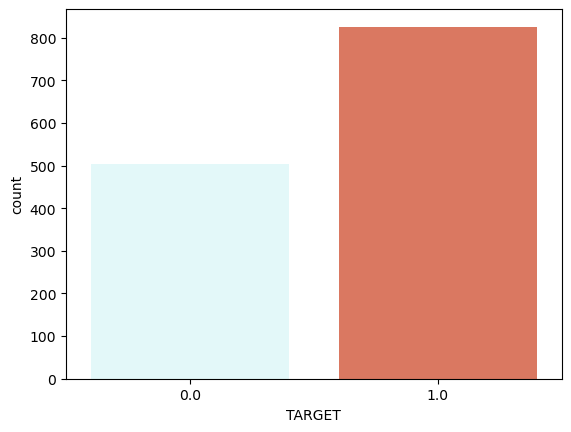

In [629]:
sns.countplot(x="TARGET", data=df)
plt.show()

In [630]:
over5Y = len(df[df.TARGET == 1])
under5Y = len(df[df.TARGET == 0])
print("Percentage of Players Played Over 5 Years: {:.2f}%".format((over5Y / (len(df.TARGET))*100)))
print("Percentage of Players Played Under 5 Years: {:.2f}%".format((under5Y / (len(df.TARGET))*100)))

Percentage of Players Played Over 5 Years: 62.15%
Percentage of Players Played Under 5 Years: 37.85%


In [631]:
grouped = round(df.groupby('TARGET').mean().apply(lambda x:100 * x / float(x.sum())),2)
grouped

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
TARGET,,,,,,,,,,,,,,,,,,,
0.0,43.89,42.02,39.07,39.0,40.44,48.3,47.18,48.87,50.15,37.75,38.3,49.26,37.55,39.58,38.89,41.17,41.89,36.38,41.19
1.0,56.11,57.98,60.93,61.0,59.56,51.7,52.82,51.13,49.85,62.25,61.7,50.74,62.45,60.42,61.11,58.83,58.11,63.62,58.81


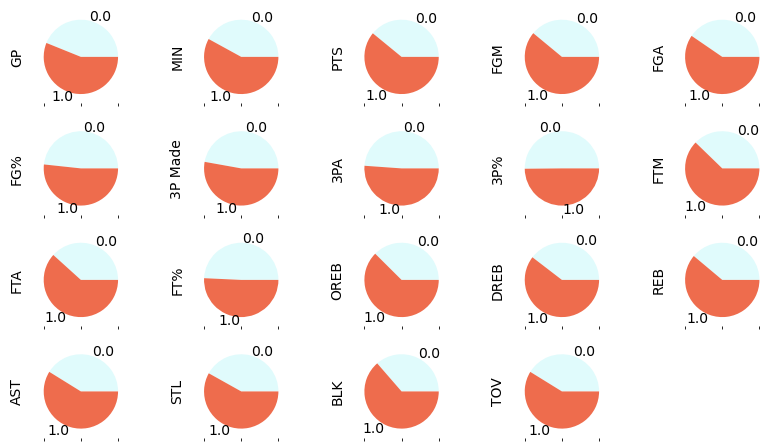

In [632]:
cat_list= ["GP", "MIN",	"PTS","FGM","FGA","FG%","3P Made","3PA","3P%","FTM","FTA","FT%","OREB","DREB","REB","AST","STL","BLK","TOV"]

        

colors = ['#e0fbfc', '#ee6c4d', '#98c1d9', '#3d5a80', '#293241']
    

grouped.reindex(columns=cat_list).plot.pie(subplots=True,
                                            legend=None,
                                             figsize=(10, 7),
                                             layout=(5, 5),
                                             colors=colors
                                             );

### Numerical Features vs. Target — Box Plot

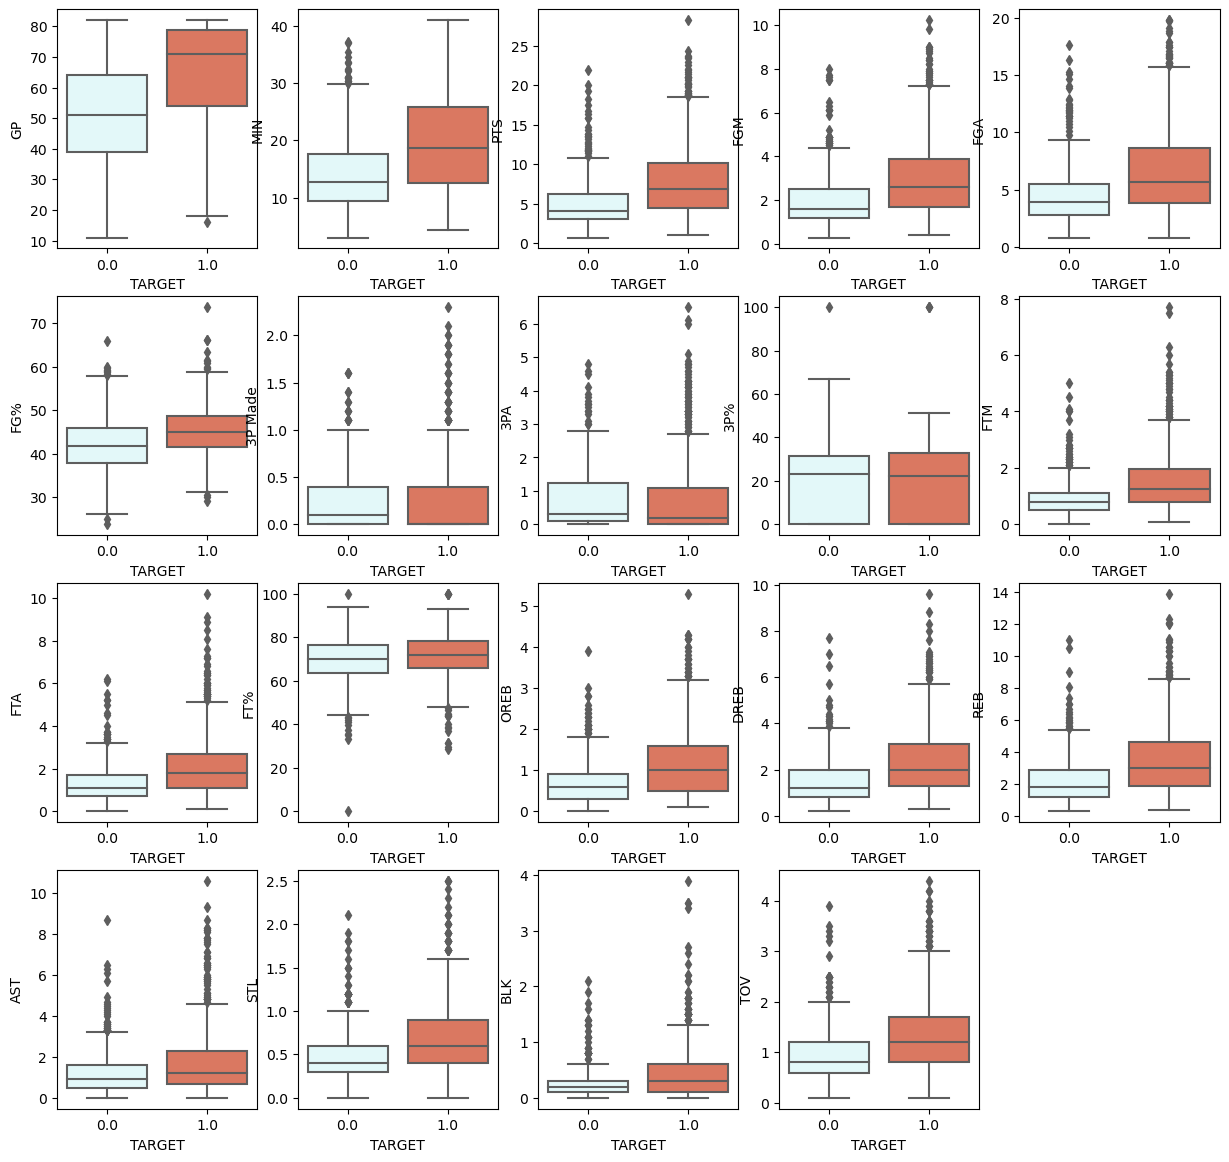

In [633]:
cat_list= ["GP", "MIN",	"PTS","FGM", "FGA",	"FG%","3P Made", "3PA",	"3P%", "FTM","FTA",	"FT%","OREB", "DREB", "REB","AST","STL","BLK","TOV"]
fig = plt.figure(figsize =(15,18))

for i in range(len(cat_list)):
    column = cat_list[i]
    sub = fig.add_subplot(5,5,i+1)
    sns.boxplot( x = "TARGET", y = column, data = df)

## MACHINE LEARNING


#### Split dataset into train and test

In [665]:
X = df.drop(["Name","TARGET"], axis=1)
y = df["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)

# Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [635]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(996, 19)
(333, 19)
(996,)
(333,)


### Model Pipeline

In [636]:
# For consistency, reproducibility, efficiency, scalability, and maintenance of the model.
model_pipeline = []

# Models that we will try

model_pipeline.append(LogisticRegression(solver="liblinear"))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())
model_pipeline.append(AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1), n_estimators = 200, algorithm = "SAMME.R", learning_rate = 0.5, random_state=42))


### Evaluate our model

In [637]:
models = ["Logistic Regression", "SVM","KNN", "Decision Tree", "Random Forest", "Naive Bayes","AdaBoost"]
acc_list = []
auc_list = []
cm_list = []

for model in model_pipeline:
    
    # Loop through each model.
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    # Accuracy: portion of correctly classified values. How often our classifier is right. Sum of all true values divided by total values.
    acc_list.append(metrics.accuracy_score(y_test,y_pred))

    # ROC (Receiver operating characteristic curve): performance of a classification model at all classification thresholds.
    # fpr: False Positive Rate  |   tpr: True Positive Rate
    fpr, tpr, _thresholds = metrics.roc_curve(y_test,y_pred)

    # Area Under the ROC Curve: provides an aggregate measure of performance across all possible classification thresholds.
    auc_list.append(round(metrics.auc(fpr,tpr),2))

    # Confusion Matrix:
    cm_list.append(confusion_matrix(y_test,y_pred))

### Confusion Matrix

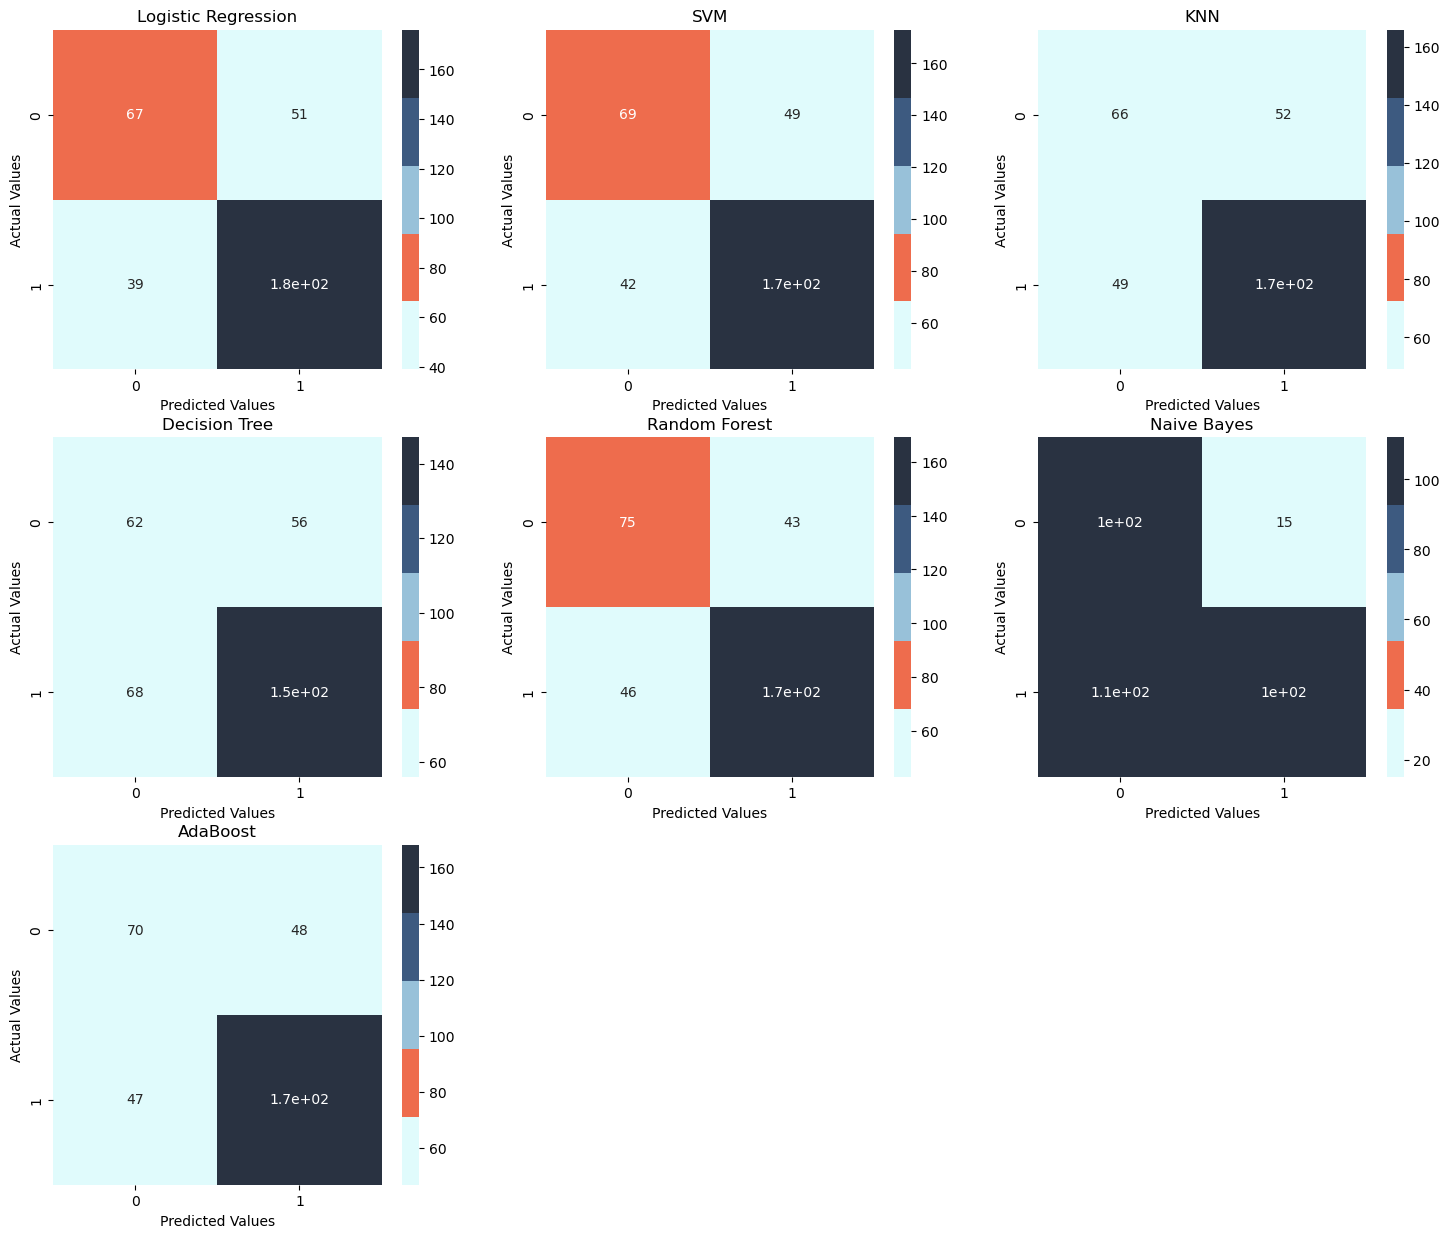

In [638]:
fig = plt.figure(figsize= (18,15))

for i in range(len(cm_list)):
    cm =cm_list[i]
    model = models[i]
    sub = fig.add_subplot(3,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True,cmap=colors)
    cm_plot.set_xlabel("Predicted Values")
    cm_plot.set_ylabel("Actual Values")

### Results

In [639]:
# Create df with our results
result_df = pd.DataFrame({"Model":models, "Accuracy":acc_list, "AUC":auc_list})

# Sort values by highest accuracy value
result_df.sort_values(by=['Accuracy'],ascending=False)

# Set index to start from 1 to n
result_df.index = np.arange(1,len(result_df)+1)
result_df

,Model,Accuracy,AUC
1,Logistic Regression,0.729730,0.69
2,SVM,0.726727,0.69
3,KNN,0.696697,0.67
4,Decision Tree,0.627628,0.60
5,Random Forest,0.732733,0.71
6,Naive Bayes,0.618619,0.68
7,AdaBoost,0.714715,0.69


### Feature Importance

Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

Text(0.5, 0, 'Feature Importance')

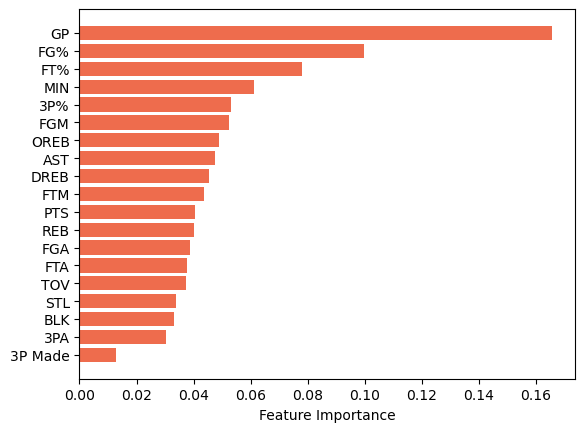

In [664]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)
df_new = df.iloc[:, 1:20]

colors = ['#e0fbfc', '#ee6c4d', '#98c1d9', '#3d5a80', '#293241']


sort = rf.feature_importances_.argsort()
plt.barh(df_new.columns[sort], rf.feature_importances_[sort],color='#ee6c4d')
plt.xlabel("Feature Importance")


### Another way to test our models with different parameters:

In [675]:
X = df.drop(["Name","TARGET"], axis=1)
y = df["TARGET"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=42)


# Preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Set parameters to our different models
log_reg_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10},{"C":100},{"C":1000}]
dec_tree_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
rand_for_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
kneighbors_params = [{"n_neighbors":3}, {"n_neighbors":5},{"n_neighbors":10},{"n_neighbors":20}]
naive_bayes_params = [{}]
svc_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10},{"C":100},{"C":1000}]


modelclasses = [
    ["Logistic Regression", LogisticRegression, log_reg_params],
    ["Decission Tree", DecisionTreeClassifier, dec_tree_params],
    ["Random Forest", RandomForestClassifier, rand_for_params],
    ["K Neighbors", KNeighborsClassifier, kneighbors_params],
    ["Naive Bayes", GaussianNB, naive_bayes_params],
    ["Suport Vector Machines", SVC, svc_params]
]

insights = []
for modelname, Model, params_list in modelclasses:
    for params in params_list:
        model = Model(**params)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        insights.append((modelname, model, params, score))


insights.sort(key=lambda x:x[-1], reverse=True)

mod_params = []
params_used = []
socre_params = []

for modelname, model, params, score in insights:
    mod_params.append(modelname)
    params_used.append(params)
    socre_params.append(score)

    

df_with_params = pd.DataFrame({"Model":mod_params, "Parameters":params_used, "Score":socre_params})

# Sort values by highest accuracy value
df_with_params.sort_values(by=['Score'],ascending=False)

# Set index to start from 1 to n
df_with_params.index = np.arange(1,len(df_with_params)+1)

df_with_params

/Users/ignaciogarciabarrero/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ignaciogarciabarrero/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

,Model,Parameters,Score
1,Logistic Regression,{'C': 1},0.732733
2,Logistic Regression,{'C': 10},0.732733
3,Logistic Regression,{'C': 100},0.732733
4,Logistic Regression,{'C': 0.01},0.729730
5,Logistic Regression,{'C': 1000},0.729730
6,Random Forest,{'criterion': 'entropy'},0.729730
7,Suport Vector Machines,{'C': 1},0.726727
8,Random Forest,{'criterion': 'gini'},0.723724
9,Logistic Regression,{'C': 0.1},0.720721
10,Suport Vector Machines,{'C': 0.1},0.711712
